In [90]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Carga de Dataset, Normalizacion y Aumento de Datos

In [4]:
base_directory = "../inputs/cacao_diseases/cacao_photos"
image_size = 256
batch_size = 32
rotation_range = 40
width_move = 0.25
height_move = 0.25
tilt_range = 15
zoom_range = 0.5

In [5]:
# Carga de Datos
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     base_directory,
#     image_size = (image_size, image_size),
#     batch_size = 32,
#     subset = "training",
#     color_mode = "rgb",
#     shuffle = True,
#     validation_split = 0.2,
#     seed = 123
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     base_directory,
#     image_size = (image_size, image_size),
#     batch_size = 32,
#     subset = "validation",
#     color_mode = "rgb",
#     shuffle = True,
#     validation_split = 0.2,
#     seed = 123
# )

In [6]:
# Aumento de Datos
train_datagenerator = ImageDataGenerator(
    rescale = 1./255, # Normalizacion
    rotation_range = rotation_range,
    width_shift_range = width_move,
    height_shift_range = height_move,
    zoom_range = zoom_range,
    shear_range = tilt_range,
    validation_split = 0.2
)

test_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [7]:
# Carga de Datos
train_data = train_datagenerator.flow_from_directory(
    base_directory,
    target_size = (image_size, image_size),
    batch_size = 32,
    subset = "training",
    shuffle = True,
    color_mode = "rgb",
)

test_data = train_datagenerator.flow_from_directory(
    base_directory,
    target_size = (image_size, image_size),
    batch_size = 32,
    subset = "validation",
    shuffle = True,
    color_mode = "rgb",
)

Found 3514 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [8]:
train_data.class_indices

{'mancha_negra': 0, 'monilia': 1, 'saludable': 2}

## Creacion de Modelo

In [9]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), input_shape=(image_size, image_size, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(units = 128, activation="relu"),
    layers.Dense(units = 50, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units = 50, activation="relu"),
    layers.Dense(units = 3, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 64)        1

In [11]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Entrenamiento

In [12]:
epochs = 150

history = model.fit(
    train_data,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = test_data,
    steps_per_epoch=int(np.ceil(60000 / float(batch_size))),
    validation_steps=int(np.ceil(10000 / float(batch_size)))
)

Epoch 1/150
110/110 [==============================] - 172s 2s/step - loss: 0.6749 - accuracy: 0.7484 - val_loss: 0.5807 - val_accuracy: 0.7626
Epoch 2/150
110/110 [==============================] - 131s 1s/step - loss: 0.5988 - accuracy: 0.7615 - val_loss: 0.6368 - val_accuracy: 0.7626
Epoch 3/150
110/110 [==============================] - 134s 1s/step - loss: 0.5894 - accuracy: 0.7615 - val_loss: 0.5838 - val_accuracy: 0.7626
Epoch 4/150
110/110 [==============================] - 141s 1s/step - loss: 0.5830 - accuracy: 0.7615 - val_loss: 0.5670 - val_accuracy: 0.7626
Epoch 5/150
110/110 [==============================] - 136s 1s/step - loss: 0.5683 - accuracy: 0.7615 - val_loss: 0.5787 - val_accuracy: 0.7626
Epoch 6/150
110/110 [==============================] - 135s 1s/step - loss: 0.5802 - accuracy: 0.7615 - val_loss: 0.6178 - val_accuracy: 0.7626
Epoch 7/150
110/110 [==============================] - 132s 1s/step - loss: 0.5708 - accuracy: 0.7615 - val_loss: 0.5683 - val_accuracy:

## Guardar Modelo

In [14]:
model.save('proyectoai_g3.h5')

## Evaluacion

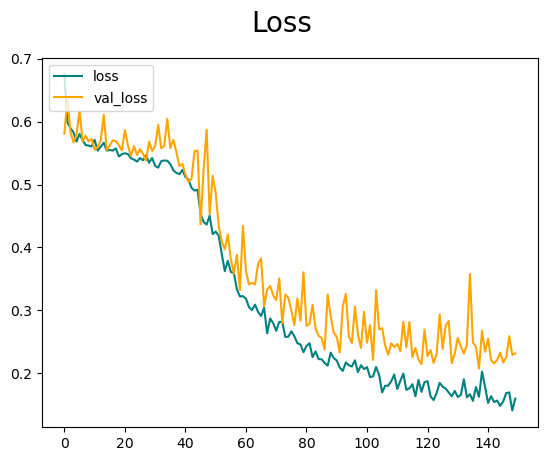

In [18]:
# Loss
fig = plt.figure()
plt.plot(history.history["loss"], color = "teal", label = "loss")
plt.plot(history.history["val_loss"], color = "orange", label = "val_loss")
plt.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

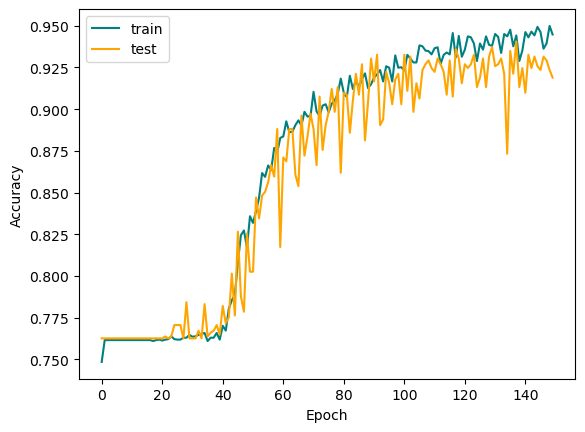

In [19]:
# Accuracy
plt.plot(history.history["accuracy"], color = "teal")
plt.plot(history.history["val_accuracy"], color = "orange")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train', 'test'])
plt.show()

In [92]:
# Matriz
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import math

test_steps_per_epoch = math.ceil(test_data.samples / test_data.batch_size)
Y_pred = model.predict(test_data)

28/28 [==============================] - 26s 913ms/step


In [93]:
preds_cls_idx = Y_pred.argmax(axis=-1)
idx_to_cls = {v: k for k, v in test_data.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)

In [94]:
from sklearn.metrics import accuracy_score
labels = test_data.classes
print('Test Data accuracy: ', accuracy_score(labels, preds_cls_idx) * 100)

Test Data accuracy:  66.55251141552512


In [95]:
import pandas as pd
cf = confusion_matrix(labels, preds_cls_idx)
df_cf = pd.DataFrame(cf, columns = test_data.class_indices, index = test_data.class_indices)
df_cf

,mancha_negra,monilia,saludable
mancha_negra,0,2,18
monilia,2,32,154
saludable,9,108,551


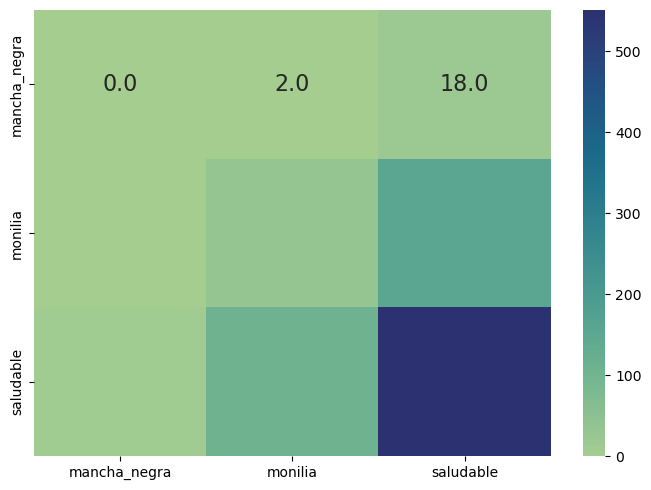

In [98]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_cf, annot = True, annot_kws = {"size": 16}, fmt = ".1f", cmap = "crest")
plt.tight_layout()
plt.savefig("foto1.png")